# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found [here](https://drive.google.com/file/d/1tgx8nnEXLcqy1ds_99T_14-2B9TM-Gne/view?usp=sharing), please downloand and place them in your local data folder from which you can read them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/liquor_store_sales.csv')

In [3]:
df.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [4]:
df.shape

(128355, 9)

In [5]:
df.describe()

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
count,128355.000000,128355.000000,128355.000000,128355.000000,128355.000000
mean,2017.206030,7.079303,6.563037,7.188161,22.624213
std,0.404454,3.645826,28.924944,30.640156,239.693277
min,2017.000000,1.000000,-6.490000,-27.660000,-4996.000000
25%,2017.000000,5.000000,0.000000,0.000000,0.000000
50%,2017.000000,8.000000,0.330000,0.000000,1.000000
75%,2017.000000,10.000000,3.250000,4.000000,4.000000
max,2018.000000,12.000000,1616.600000,1587.990000,16271.750000


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

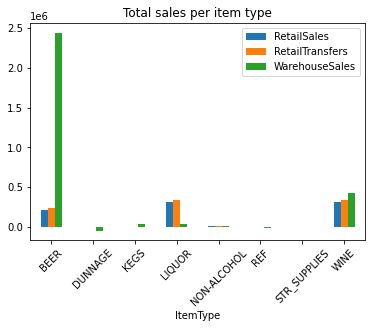

In [6]:
# first transform df by grouping on item type
df_bar_chart = df.groupby(['ItemType']).agg('sum').reset_index()

#same option df2 = df.pivot_table(values = ['RetailSales', 'RetailTransfers','WarehouseSales'], index = 'ItemType', aggfunc='sum')

#make visual
df_bar_chart[['ItemType','RetailSales','RetailTransfers','WarehouseSales']].plot.bar(x = 'ItemType')
plt.title('Total sales per item type')
plt.xticks(rotation = 45)
plt.show()

#So beer is mainly sold via warehouse, liquor mainly via retail. Wine more equally distributed

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

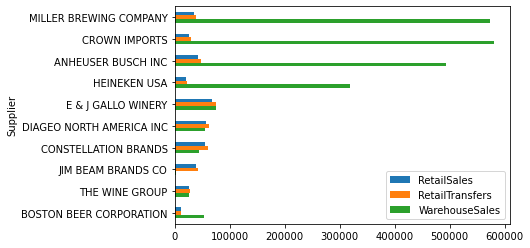

In [7]:
# first transform df by grouping on supplier
df_bar_chart2 = df.groupby('Supplier').agg('sum')

#adding up sales
df_bar_chart2['TotalSales'] = df_bar_chart2['RetailSales'] + df_bar_chart2['RetailTransfers'] + df_bar_chart2['WarehouseSales']

#sort by sales
df_bar_chart3 = df_bar_chart2.sort_values('TotalSales', ascending = False).head(10)

#make visual
df_bar_chart3[['RetailSales', 'RetailTransfers', 'WarehouseSales']].plot.barh()

#change order of axis (found on stackoverflow)
plt.gca().invert_yaxis()

plt.show()

## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

<Figure size 1440x864 with 0 Axes>

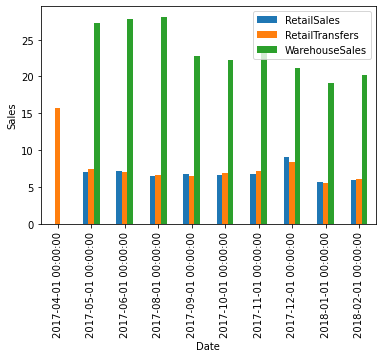

In [8]:
#first combine month & year to dateframe as new column
#stackoverflow inspiration df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY = 1))

df2 = df[[ 'Date','RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(['Date']).agg('mean')
df2

plt.figure(figsize=(20,12))
df2.plot.bar()
plt.ylabel('Sales')

#found on stackoverflow to remove time from x-axis, but did not get it to work yet
#xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
#xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))

plt.show();

#used ; to remove text as learned by Paolo in lab23
#interesting to see that april 2017 only has retailtransfers and july 2017 is not in dataset
#paolo: yes- to improve the vizual  better to just show year and month on x-axis?

## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

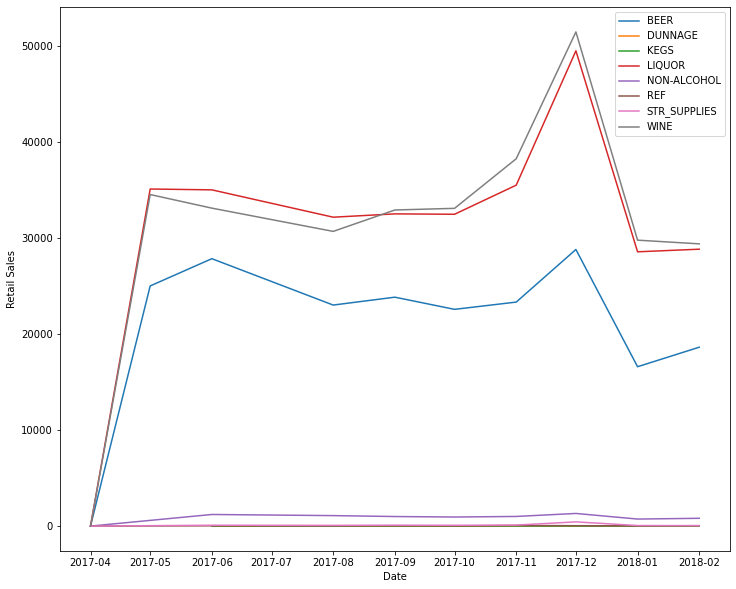

In [9]:
df2 = df.pivot_table(values = 'RetailSales', index = 'Date', columns = 'ItemType', aggfunc = 'sum')
df2

#because more than 6 columns we need to use dashes = false
plt.figure(figsize=(12,10))
sns.lineplot(data = df2, hue = 'ItemType', dashes = False)
plt.ylabel('Retail Sales')
plt.show();

## 6. Plot the same information as above (i.e. Q5) but as a bar chart.

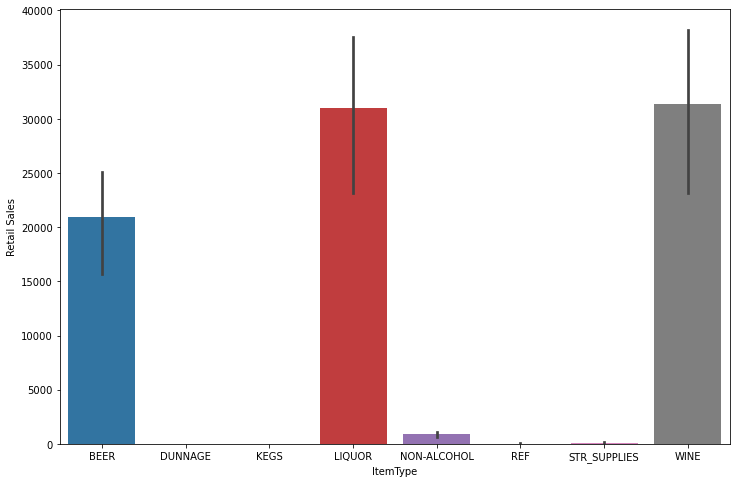

In [10]:
plt.figure(figsize=(12,8))

sns.barplot(data = df2)
plt.ylabel('Retail Sales')

plt.show();
#paolo: not exactly the requested vizual. time should be on x-axis -check solution
#

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

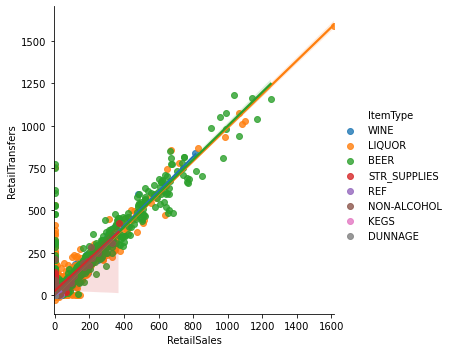

In [11]:
sns.lmplot(x ='RetailSales', y ='RetailTransfers', data = df, hue= 'ItemType')
#paolo: good work!

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

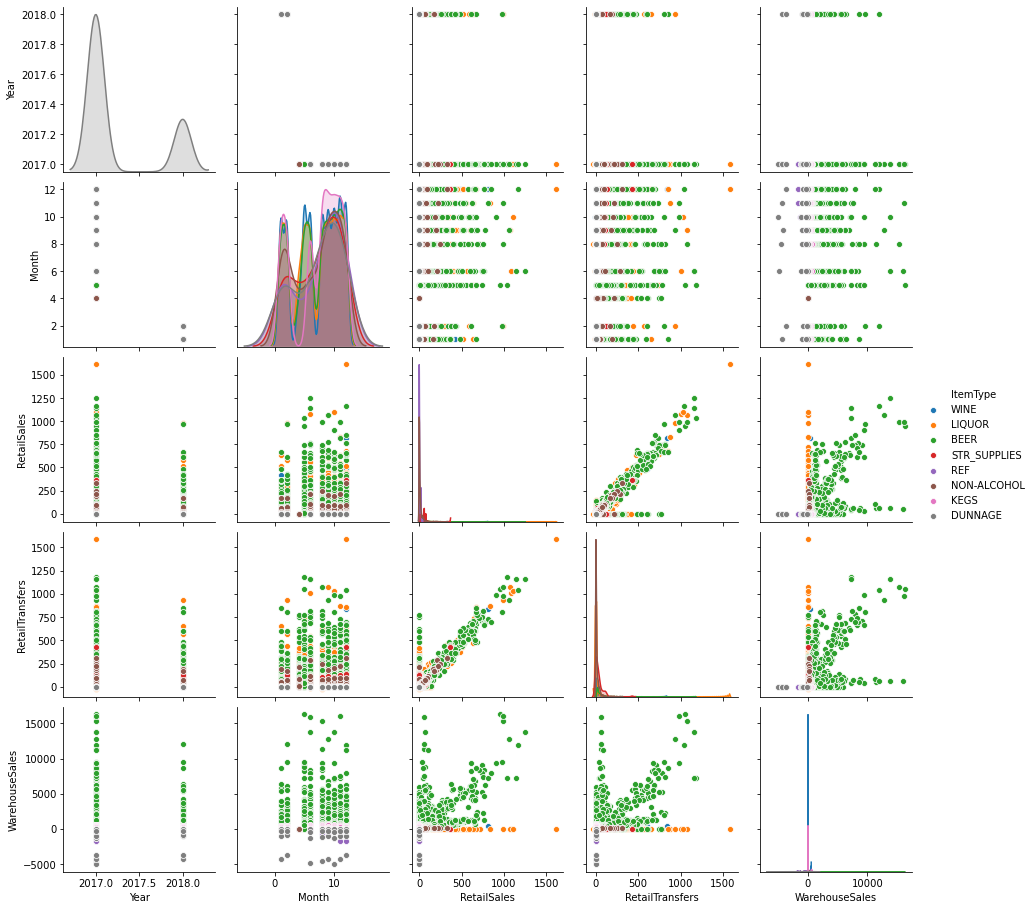

In [12]:
sns.pairplot(data = df, hue = 'ItemType')

In [ ]:
#paolo check ok good work!